In [1]:
%load_ext autoreload
%autoreload 2

In [120]:
import netherlands
import models
import mscthesis
import pandas as pd
import geopandas as gpd
import validation
import numpy as np
import datetime
import genericvalidation
import matplotlib as mpl

In [88]:
tripsx = trips.groupby(['OPID','trip_id']).apply(trip_row)

In [87]:
def trip_row(df):
    row = df.iloc[0]
    row['dest_zip'] = df.iloc[-1]['dest_zip']
    row['dest_time'] = df.iloc[-1]['dest_time']
    return row

In [92]:
tripsx.reset_index(drop=True)

,OPID,home_city,year,month,day,trip_id,origin_time,origin_zip,dest_time,dest_zip,weight_trip
0,17101001.0,14.0,2017.0,1.0,1.0,1.710100e+09,17.0,9718.0,17.0,9712.0,182803.629418
1,17101001.0,14.0,2017.0,1.0,1.0,1.710100e+09,17.0,9712.0,17.0,9718.0,182803.629418
2,17101002.0,80.0,2017.0,1.0,1.0,1.710100e+09,14.0,8911.0,14.0,8911.0,225747.250523
3,17101002.0,80.0,2017.0,1.0,1.0,1.710100e+09,19.0,8911.0,19.0,8911.0,225747.250523
4,17101002.0,80.0,2017.0,1.0,1.0,1.710100e+09,21.0,8911.0,21.0,8911.0,225747.250523
...,...,...,...,...,...,...,...,...,...,...,...
97625,17752083.0,1640.0,2017.0,12.0,30.0,1.775208e+09,5.0,6093.0,5.0,6093.0,202903.436789
97626,17752083.0,1640.0,2017.0,12.0,30.0,1.775208e+09,12.0,6093.0,12.0,6093.0,202903.436789
97627,17752084.0,1674.0,2017.0,12.0,30.0,1.775208e+09,15.0,4707.0,15.0,4708.0,107504.129576
97628,17752084.0,1674.0,2017.0,12.0,30.0,1.775208e+09,16.0,4708.0,16.0,4707.0,107504.129576


In [3]:
sampler = models.Sampler(
    model=models.PreferentialReturn(
        p=0.2,
        gamma=0.8,
        region_sampling=models.RegionTransitionZipf(
            beta=0.05,
        ),
        jump_size_sampling=models.JumpSizeTrueProb(),
    ),
    daily_trips_sampling=models.NormalDistribution(3.14, 1.8),
    n_days=7*20,
    geotweets_path="",
)

In [4]:
geotweets = mscthesis.read_geotweets_raw("../../dbs/netherlands/geotweets.csv").set_index('userid')

# Only look at weekday trips
#geotweets = geotweets[(geotweets['weekday'] < 6) & (0 < geotweets['weekday'])]

# Remove users who don't have home visit in geotweets
home_visits = geotweets.query("label == 'home'").groupby('userid').size()
geotweets = geotweets.loc[home_visits.index]

# Remove users with less than 20 tweets
tweetcount = geotweets.groupby('userid').size()
geotweets = geotweets.drop(labels=tweetcount[tweetcount < 20].index)

# Remove users with only one region
regioncount = geotweets.groupby(['userid', 'region']).size().groupby('userid').size()
geotweets = geotweets.drop(labels=regioncount[regioncount < 2].index)

# Ensure the tweets are sorted chronologically
geotweets = geotweets.sort_values(by=['userid', 'createdat'])

In [5]:
geotweets.shape

(1537731, 12)

In [6]:
baseline = models.geotweets_to_visits(geotweets)

In [7]:
geotweetsx = geotweets.loc[geotweets.groupby('userid').size()[:10].index]

In [28]:
print(datetime.datetime.now())
visits = sampler.sample(geotweets)
print(datetime.datetime.now())

2020-05-04 13:35:14.151201
IPF converged after 9 iterations
IPF converged after 18 iterations
IPF converged after 25 iterations
IPF converged after 3 iterations
IPF converged after 17 iterations
IPF converged after 6 iterations
IPF converged after 16 iterations
IPF converged after 12 iterations
IPF converged after 26 iterations
IPF converged after 11 iterations
IPF converged after 7 iterations
IPF converged after 24 iterations
IPF converged after 10 iterations
IPF converged after 9 iterations
IPF converged after 12 iterations
IPF converged after 14 iterations
IPF converged after 6 iterations
IPF converged after 23 iterations
IPF converged after 5 iterations
IPF converged after 29 iterations
IPF converged after 23 iterations
IPF converged after 16 iterations
IPF converged after 14 iterations
IPF converged after 9 iterations
IPF converged after 30 iterations
IPF converged after 9 iterations
IPF converged after 26 iterations
IPF converged after 14 iterations
IPF converged after 19 iterati

IPF converged after 42 iterations
IPF converged after 10 iterations
IPF converged after 33 iterations
IPF converged after 19 iterations
IPF converged after 14 iterations
IPF converged after 31 iterations
IPF converged after 31 iterations
IPF converged after 18 iterations
done with 250
IPF converged after 36 iterations
IPF converged after 17 iterations
IPF converged after 8 iterations
IPF converged after 24 iterations
IPF converged after 13 iterations
IPF converged after 18 iterations
IPF converged after 20 iterations
IPF converged after 20 iterations
IPF converged after 15 iterations
IPF converged after 13 iterations
IPF converged after 28 iterations
IPF converged after 11 iterations
IPF converged after 24 iterations
IPF converged after 10 iterations
IPF converged after 6 iterations
IPF converged after 9 iterations
IPF converged after 9 iterations
IPF converged after 16 iterations
IPF converged after 11 iterations
IPF converged after 14 iterations
IPF converged after 20 iterations
IPF 

IPF converged after 25 iterations
IPF converged after 16 iterations
IPF converged after 12 iterations
IPF converged after 22 iterations
IPF converged after 20 iterations
IPF converged after 12 iterations
IPF converged after 7 iterations
IPF converged after 16 iterations
IPF converged after 23 iterations
IPF converged after 23 iterations
IPF converged after 16 iterations
IPF converged after 16 iterations
IPF converged after 5 iterations
IPF converged after 9 iterations
IPF converged after 21 iterations
IPF converged after 7 iterations
done with 500
IPF converged after 24 iterations
IPF converged after 5 iterations
IPF converged after 24 iterations
IPF converged after 9 iterations
IPF converged after 11 iterations
IPF converged after 9 iterations
IPF converged after 19 iterations
IPF converged after 34 iterations
IPF converged after 8 iterations
IPF converged after 10 iterations
IPF converged after 8 iterations
IPF converged after 28 iterations
IPF converged after 13 iterations
IPF conve

IPF converged after 13 iterations
IPF converged after 12 iterations
IPF converged after 14 iterations
IPF converged after 8 iterations
IPF converged after 7 iterations
IPF converged after 16 iterations
IPF converged after 13 iterations
IPF converged after 8 iterations
IPF converged after 18 iterations
IPF converged after 21 iterations
IPF converged after 12 iterations
IPF converged after 27 iterations
IPF converged after 18 iterations
IPF converged after 21 iterations
IPF converged after 36 iterations
IPF converged after 23 iterations
IPF converged after 11 iterations
IPF converged after 27 iterations
IPF converged after 26 iterations
IPF converged after 15 iterations
IPF converged after 11 iterations
IPF converged after 26 iterations
IPF converged after 28 iterations
done with 750
IPF converged after 6 iterations
IPF converged after 14 iterations
IPF converged after 20 iterations
IPF converged after 10 iterations
IPF converged after 23 iterations
IPF converged after 6 iterations
IPF c

IPF converged after 16 iterations
IPF converged after 17 iterations
IPF converged after 7 iterations
IPF converged after 19 iterations
IPF converged after 11 iterations
IPF converged after 19 iterations
IPF converged after 40 iterations
IPF converged after 17 iterations
IPF converged after 27 iterations
IPF converged after 24 iterations
IPF converged after 22 iterations
IPF converged after 24 iterations
IPF converged after 8 iterations
IPF converged after 11 iterations
IPF converged after 12 iterations
IPF converged after 18 iterations
IPF converged after 17 iterations
IPF converged after 6 iterations
IPF converged after 20 iterations
IPF converged after 43 iterations
IPF converged after 22 iterations
IPF converged after 36 iterations
IPF converged after 22 iterations
IPF converged after 5 iterations
IPF converged after 9 iterations
IPF converged after 9 iterations
IPF converged after 33 iterations
IPF converged after 11 iterations
IPF converged after 9 iterations
IPF converged after 1

IPF converged after 18 iterations
IPF converged after 21 iterations
IPF converged after 5 iterations
IPF converged after 23 iterations
IPF converged after 14 iterations
IPF converged after 15 iterations
IPF converged after 29 iterations
IPF converged after 31 iterations
IPF converged after 12 iterations
IPF converged after 6 iterations
IPF converged after 11 iterations
IPF converged after 9 iterations
IPF converged after 16 iterations
IPF converged after 24 iterations
IPF converged after 5 iterations
IPF converged after 22 iterations
IPF converged after 8 iterations
IPF converged after 25 iterations
IPF converged after 18 iterations
IPF converged after 32 iterations
IPF converged after 22 iterations
IPF converged after 14 iterations
IPF converged after 14 iterations
IPF converged after 26 iterations
IPF converged after 14 iterations
IPF converged after 4 iterations
IPF converged after 20 iterations
IPF converged after 14 iterations
IPF converged after 11 iterations
IPF converged after 

IPF converged after 16 iterations
IPF converged after 5 iterations
IPF converged after 15 iterations
IPF converged after 31 iterations
IPF converged after 23 iterations
IPF converged after 23 iterations
IPF converged after 12 iterations
IPF converged after 15 iterations
IPF converged after 10 iterations
IPF converged after 9 iterations
IPF converged after 22 iterations
IPF converged after 14 iterations
IPF converged after 5 iterations
IPF converged after 4 iterations
IPF converged after 15 iterations
IPF converged after 14 iterations
IPF converged after 15 iterations
IPF converged after 19 iterations
IPF converged after 25 iterations
IPF converged after 18 iterations
IPF converged after 10 iterations
IPF converged after 22 iterations
IPF converged after 8 iterations
IPF converged after 12 iterations
IPF converged after 7 iterations
IPF converged after 27 iterations
IPF converged after 17 iterations
IPF converged after 40 iterations
IPF converged after 26 iterations
IPF converged after 

IPF converged after 6 iterations
IPF converged after 5 iterations
IPF converged after 10 iterations
IPF converged after 11 iterations
IPF converged after 16 iterations
IPF converged after 17 iterations
IPF converged after 10 iterations
IPF converged after 2 iterations
IPF converged after 29 iterations
IPF converged after 16 iterations
IPF converged after 10 iterations
IPF converged after 29 iterations
IPF converged after 17 iterations
IPF converged after 21 iterations
IPF converged after 6 iterations
IPF converged after 22 iterations
IPF converged after 26 iterations
IPF converged after 19 iterations
IPF converged after 39 iterations
IPF converged after 9 iterations
IPF converged after 44 iterations
IPF converged after 16 iterations
IPF converged after 3 iterations
IPF converged after 29 iterations
IPF converged after 37 iterations
IPF converged after 15 iterations
IPF converged after 18 iterations
IPF converged after 7 iterations
IPF converged after 16 iterations
IPF converged after 1

IPF converged after 22 iterations
IPF converged after 9 iterations
IPF converged after 22 iterations
IPF converged after 10 iterations
IPF converged after 20 iterations
IPF converged after 17 iterations
IPF converged after 14 iterations
IPF converged after 12 iterations
IPF converged after 7 iterations
IPF converged after 8 iterations
IPF converged after 21 iterations
IPF converged after 25 iterations
IPF converged after 15 iterations
IPF converged after 11 iterations
IPF converged after 16 iterations
IPF converged after 21 iterations
IPF converged after 4 iterations
IPF converged after 38 iterations
IPF converged after 13 iterations
IPF converged after 8 iterations
IPF converged after 8 iterations
IPF converged after 4 iterations
IPF converged after 17 iterations
IPF converged after 17 iterations
IPF converged after 15 iterations
IPF converged after 4 iterations
IPF converged after 16 iterations
IPF converged after 10 iterations
IPF converged after 20 iterations
IPF converged after 14

IPF converged after 16 iterations
IPF converged after 16 iterations
IPF converged after 20 iterations
IPF converged after 15 iterations
IPF converged after 8 iterations
IPF converged after 14 iterations
IPF converged after 21 iterations
IPF converged after 24 iterations
IPF converged after 25 iterations
IPF converged after 23 iterations
IPF converged after 19 iterations
IPF converged after 14 iterations
IPF converged after 17 iterations
IPF converged after 21 iterations
IPF converged after 8 iterations
IPF converged after 10 iterations
IPF converged after 18 iterations
IPF converged after 27 iterations
IPF converged after 7 iterations
IPF converged after 9 iterations
IPF converged after 10 iterations
IPF converged after 12 iterations
IPF converged after 8 iterations
IPF converged after 28 iterations
IPF converged after 2 iterations
IPF converged after 7 iterations
IPF converged after 10 iterations
IPF converged after 12 iterations
IPF converged after 26 iterations
IPF converged after 2

IPF converged after 19 iterations
IPF converged after 17 iterations
IPF converged after 9 iterations
IPF converged after 19 iterations
IPF converged after 13 iterations
IPF converged after 7 iterations
IPF converged after 18 iterations
IPF converged after 15 iterations
IPF converged after 18 iterations
IPF converged after 22 iterations
IPF converged after 33 iterations
IPF converged after 3 iterations
IPF converged after 22 iterations
IPF converged after 14 iterations
IPF converged after 24 iterations
IPF converged after 10 iterations
IPF converged after 25 iterations
IPF converged after 5 iterations
IPF converged after 9 iterations
IPF converged after 18 iterations
IPF converged after 27 iterations
IPF converged after 25 iterations
IPF converged after 26 iterations
IPF converged after 11 iterations
IPF converged after 23 iterations
IPF converged after 37 iterations
IPF converged after 15 iterations
IPF converged after 20 iterations
IPF converged after 15 iterations
IPF converged after

IPF converged after 30 iterations
IPF converged after 19 iterations
IPF converged after 25 iterations
IPF converged after 18 iterations
IPF converged after 16 iterations
IPF converged after 13 iterations
IPF converged after 12 iterations
IPF converged after 15 iterations
IPF converged after 17 iterations
IPF converged after 3 iterations
IPF converged after 17 iterations
IPF converged after 27 iterations
IPF converged after 4 iterations
IPF converged after 13 iterations
IPF converged after 28 iterations
IPF converged after 18 iterations
IPF converged after 3 iterations
IPF converged after 21 iterations
IPF converged after 24 iterations
IPF converged after 12 iterations
IPF converged after 52 iterations
IPF converged after 12 iterations
IPF converged after 21 iterations
IPF converged after 43 iterations
IPF converged after 3 iterations
IPF converged after 21 iterations
IPF converged after 34 iterations
IPF converged after 25 iterations
IPF converged after 35 iterations
IPF converged afte

IPF converged after 33 iterations
IPF converged after 4 iterations
IPF converged after 31 iterations
IPF converged after 12 iterations
IPF converged after 34 iterations
IPF converged after 27 iterations
IPF converged after 12 iterations
IPF converged after 14 iterations
IPF converged after 12 iterations
IPF converged after 30 iterations
IPF converged after 22 iterations
IPF converged after 25 iterations
IPF converged after 30 iterations
IPF converged after 12 iterations
IPF converged after 13 iterations
IPF converged after 20 iterations
IPF converged after 22 iterations
IPF converged after 23 iterations
IPF converged after 9 iterations
IPF converged after 20 iterations
IPF converged after 20 iterations
IPF converged after 11 iterations
IPF converged after 12 iterations
IPF converged after 3 iterations
IPF converged after 13 iterations
IPF converged after 18 iterations
IPF converged after 5 iterations
IPF converged after 17 iterations
IPF converged after 15 iterations
IPF converged afte

IPF converged after 25 iterations
IPF converged after 31 iterations
IPF converged after 12 iterations
IPF converged after 17 iterations
IPF converged after 32 iterations
IPF converged after 8 iterations
IPF converged after 23 iterations
IPF converged after 4 iterations
IPF converged after 18 iterations
IPF converged after 17 iterations
IPF converged after 12 iterations
IPF converged after 6 iterations
IPF converged after 18 iterations
IPF converged after 15 iterations
IPF converged after 26 iterations
IPF converged after 22 iterations
IPF converged after 28 iterations
IPF converged after 12 iterations
IPF converged after 24 iterations
IPF converged after 14 iterations
IPF converged after 31 iterations
IPF converged after 19 iterations
IPF converged after 8 iterations
IPF converged after 11 iterations
IPF converged after 23 iterations
IPF converged after 13 iterations
IPF converged after 18 iterations
IPF converged after 12 iterations
IPF converged after 19 iterations
IPF converged afte

IPF converged after 8 iterations
IPF converged after 18 iterations
IPF converged after 3 iterations
IPF converged after 19 iterations
IPF converged after 32 iterations
IPF converged after 18 iterations
IPF converged after 31 iterations
IPF converged after 17 iterations
IPF converged after 12 iterations
IPF converged after 15 iterations
IPF converged after 7 iterations
IPF converged after 11 iterations
IPF converged after 20 iterations
IPF converged after 18 iterations
IPF converged after 45 iterations
IPF converged after 17 iterations
IPF converged after 21 iterations
IPF converged after 6 iterations
IPF converged after 25 iterations
IPF converged after 18 iterations
IPF converged after 35 iterations
IPF converged after 30 iterations
IPF converged after 32 iterations
IPF converged after 4 iterations
IPF converged after 10 iterations
IPF converged after 5 iterations
IPF converged after 26 iterations
IPF converged after 21 iterations
IPF converged after 22 iterations
IPF converged after 

IPF converged after 29 iterations
IPF converged after 29 iterations
IPF converged after 19 iterations
IPF converged after 4 iterations
IPF converged after 5 iterations
IPF converged after 22 iterations
IPF converged after 20 iterations
IPF converged after 22 iterations
IPF converged after 16 iterations
IPF converged after 6 iterations
IPF converged after 18 iterations
IPF converged after 15 iterations
IPF converged after 14 iterations
IPF converged after 4 iterations
IPF converged after 5 iterations
IPF converged after 17 iterations
IPF converged after 21 iterations
IPF converged after 30 iterations
IPF converged after 9 iterations
IPF converged after 22 iterations
IPF converged after 3 iterations
IPF converged after 17 iterations
IPF converged after 37 iterations
IPF converged after 21 iterations
IPF converged after 28 iterations
IPF converged after 6 iterations
IPF converged after 16 iterations
IPF converged after 19 iterations
IPF converged after 9 iterations
IPF converged after 25 

IPF converged after 26 iterations
IPF converged after 5 iterations
IPF converged after 10 iterations
IPF converged after 16 iterations
IPF converged after 46 iterations
IPF converged after 21 iterations
IPF converged after 12 iterations
IPF converged after 6 iterations
IPF converged after 20 iterations
IPF converged after 11 iterations
IPF converged after 16 iterations
IPF converged after 12 iterations
IPF converged after 28 iterations
IPF converged after 13 iterations
IPF converged after 13 iterations
IPF converged after 7 iterations
IPF converged after 12 iterations
IPF converged after 22 iterations
IPF converged after 21 iterations
IPF converged after 29 iterations
IPF converged after 27 iterations
IPF converged after 8 iterations
IPF converged after 22 iterations
IPF converged after 13 iterations
IPF converged after 2 iterations
IPF converged after 9 iterations
IPF converged after 15 iterations
IPF converged after 16 iterations
IPF converged after 26 iterations
IPF converged after 

IPF converged after 11 iterations
IPF converged after 10 iterations
IPF converged after 22 iterations
IPF converged after 28 iterations
IPF converged after 21 iterations
IPF converged after 24 iterations
IPF converged after 38 iterations
IPF converged after 39 iterations
IPF converged after 5 iterations
IPF converged after 5 iterations
IPF converged after 20 iterations
IPF converged after 28 iterations
IPF converged after 21 iterations
IPF converged after 20 iterations
IPF converged after 13 iterations
IPF converged after 7 iterations
IPF converged after 14 iterations
IPF converged after 18 iterations
IPF converged after 14 iterations
IPF converged after 4 iterations
IPF converged after 30 iterations
IPF converged after 27 iterations
IPF converged after 30 iterations
IPF converged after 45 iterations
IPF converged after 12 iterations
IPF converged after 15 iterations
IPF converged after 18 iterations
IPF converged after 25 iterations
IPF converged after 16 iterations
IPF converged afte

IPF converged after 3 iterations
IPF converged after 14 iterations
IPF converged after 35 iterations
IPF converged after 25 iterations
IPF converged after 24 iterations
IPF converged after 28 iterations
IPF converged after 21 iterations
IPF converged after 36 iterations
IPF converged after 42 iterations
IPF converged after 17 iterations
IPF converged after 26 iterations
IPF converged after 20 iterations
IPF converged after 12 iterations
IPF converged after 17 iterations
IPF converged after 22 iterations
IPF converged after 25 iterations
IPF converged after 6 iterations
IPF converged after 8 iterations
IPF converged after 10 iterations
IPF converged after 42 iterations
IPF converged after 9 iterations
IPF converged after 28 iterations
IPF converged after 28 iterations
IPF converged after 15 iterations
IPF converged after 12 iterations
IPF converged after 8 iterations
IPF converged after 23 iterations
IPF converged after 39 iterations
IPF converged after 19 iterations
IPF converged after

IPF converged after 4 iterations
IPF converged after 18 iterations
IPF converged after 3 iterations
IPF converged after 43 iterations
IPF converged after 29 iterations
IPF converged after 11 iterations
IPF converged after 23 iterations
IPF converged after 20 iterations
IPF converged after 10 iterations
IPF converged after 19 iterations
IPF converged after 32 iterations
IPF converged after 14 iterations
IPF converged after 7 iterations
IPF converged after 19 iterations
IPF converged after 18 iterations
IPF converged after 14 iterations
IPF converged after 22 iterations
IPF converged after 43 iterations
IPF converged after 3 iterations
IPF converged after 31 iterations
IPF converged after 15 iterations
IPF converged after 12 iterations
IPF converged after 18 iterations
IPF converged after 7 iterations
IPF converged after 13 iterations
IPF converged after 15 iterations
IPF converged after 18 iterations
IPF converged after 27 iterations
IPF converged after 10 iterations
IPF converged after

IPF converged after 3 iterations
IPF converged after 21 iterations
IPF converged after 22 iterations
IPF converged after 9 iterations
IPF converged after 18 iterations
IPF converged after 24 iterations
IPF converged after 2 iterations
IPF converged after 3 iterations
IPF converged after 6 iterations
IPF converged after 17 iterations
IPF converged after 23 iterations
IPF converged after 11 iterations
IPF converged after 15 iterations
IPF converged after 6 iterations
IPF converged after 19 iterations
IPF converged after 12 iterations
IPF converged after 20 iterations
IPF converged after 38 iterations
IPF converged after 21 iterations
IPF converged after 14 iterations
IPF converged after 26 iterations
IPF converged after 15 iterations
IPF converged after 16 iterations
IPF converged after 17 iterations
IPF converged after 10 iterations
IPF converged after 14 iterations
IPF converged after 16 iterations
IPF converged after 18 iterations
IPF converged after 19 iterations
IPF converged after 

IPF converged after 17 iterations
IPF converged after 8 iterations
IPF converged after 15 iterations
IPF converged after 24 iterations
IPF converged after 13 iterations
IPF converged after 37 iterations
IPF converged after 3 iterations
IPF converged after 20 iterations
IPF converged after 16 iterations
IPF converged after 8 iterations
IPF converged after 23 iterations
IPF converged after 3 iterations
IPF converged after 31 iterations
IPF converged after 9 iterations
IPF converged after 20 iterations
IPF converged after 19 iterations
IPF converged after 26 iterations
IPF converged after 27 iterations
IPF converged after 6 iterations
IPF converged after 15 iterations
IPF converged after 41 iterations
IPF converged after 4 iterations
IPF converged after 13 iterations
IPF converged after 41 iterations
IPF converged after 4 iterations
IPF converged after 3 iterations
IPF converged after 21 iterations
IPF converged after 32 iterations
IPF converged after 21 iterations
IPF converged after 16 

In [9]:
#visits = pd.read_csv("../../dbs/netherlands/visits.csv").set_index('userid')
visits

,day,timeslot,kind,latitude,longitude,region
userid,,,,,,
1013,0,0,region,51.824402,4.927636,15
1013,0,1,region,51.824402,4.927636,15
1013,0,2,region,51.786387,4.761221,3
1013,1,0,region,51.824402,4.927636,15
1013,1,1,region,51.824402,4.927636,15
...,...,...,...,...,...,...
821758,138,3,region,52.277167,5.191500,86
821758,138,4,region,52.298448,5.242329,188
821758,138,5,region,52.360000,4.898167,15


In [29]:
visits.to_csv('./../../dbs/netherlands/visits.csv')

In [11]:
zones = netherlands.zones()

In [93]:
odm = netherlands.odm()

In [94]:
odm

zone  zone
1011  1011    0.000155
      1012    0.000060
      1013    0.000005
      1014    0.000000
      1015    0.000000
                ...   
9875  5359    0.000000
      7515    0.000000
      9614    0.000000
      9622    0.000000
      9875    0.000000
Name: weight_trip, Length: 16532356, dtype: float64

In [16]:
distance = genericvalidation.zone_distances(zones)
qgrps = genericvalidation.distance_quantiles(distance)

Calculating distances between zones...
Calculating quantiles...


In [17]:
baseline_odm = genericvalidation.visits_to_odm(baseline, zones)

Convering visits to zone CRS
Aligning region-visits to Sampers zones...
removed 264977 region-visits due to missing zone geom
Aligning point-visits to Sampers zones...
1272754 visits left after alignment
Creating odm...


In [30]:
model_odm = genericvalidation.visits_to_odm(visits, zones)

Convering visits to zone CRS
Aligning region-visits to Sampers zones...
removed 88495 region-visits due to missing zone geom
Aligning point-visits to Sampers zones...
removed 7492 point-visits due to missing zone geom
3008781 visits left after alignment
Creating odm...


In [19]:
baseline_odm

1011  1011    0.001318
      1012    0.000495
      1013    0.000037
      1014    0.000024
      1015    0.000031
                ...   
9875  5359    0.000000
      7515    0.000000
      9614    0.000000
      9622    0.000000
      9875    0.000000
Length: 16532356, dtype: float64

In [95]:
dms = validation.DistanceMetrics().compute(qgrps, [odm, baseline_odm, model_odm], ['groundtruth', 'baseline', 'model'])

In [96]:
dms

,groundtruth_mean,baseline_mean,model_mean,groundtruth_variance,baseline_variance,model_variance,groundtruth_sum,baseline_sum,model_sum
distance,,,,,,,,,
"(-0.001, 9.548]",4.787094e-06,4.310470e-06,4.832170e-06,5.779525e-10,4.037679e-09,7.074402e-09,0.791422,0.712624,7.988736e-01
"(9.548, 14.357]",3.643907e-07,2.549334e-07,3.015686e-07,5.486737e-12,4.471031e-12,8.287727e-12,0.060243,0.042147,4.985652e-02
"(14.357, 18.128]",1.638829e-07,1.483731e-07,1.720355e-07,2.205114e-12,1.710306e-12,2.203629e-12,0.027094,0.024530,2.844159e-02
"(18.128, 21.389]",1.106520e-07,1.112560e-07,1.238701e-07,1.422882e-12,8.540498e-13,1.061575e-12,0.018293,0.018393,2.047871e-02
"(21.389, 24.365]",8.308944e-08,9.024565e-08,9.228798e-08,1.140704e-12,7.026179e-13,1.040048e-12,0.013737,0.014920,1.525723e-02
...,...,...,...,...,...,...,...,...,...
"(218.687, 225.923]",4.379691e-10,6.871776e-10,8.055415e-12,4.879740e-15,6.395581e-16,2.681908e-18,0.000072,0.000114,1.331753e-06
"(225.923, 234.882]",0.000000e+00,6.394570e-10,8.055415e-12,0.000000e+00,6.245618e-16,2.681908e-18,0.000000,0.000106,1.331753e-06
"(234.882, 247.293]",4.639323e-10,5.678828e-10,6.041634e-12,5.257399e-15,4.928833e-16,2.011467e-18,0.000077,0.000094,9.988151e-07


In [3]:
import plots
import matplotlib.pyplot as plt
import matplotlib as mpl

NameError: name 'dms' is not defined

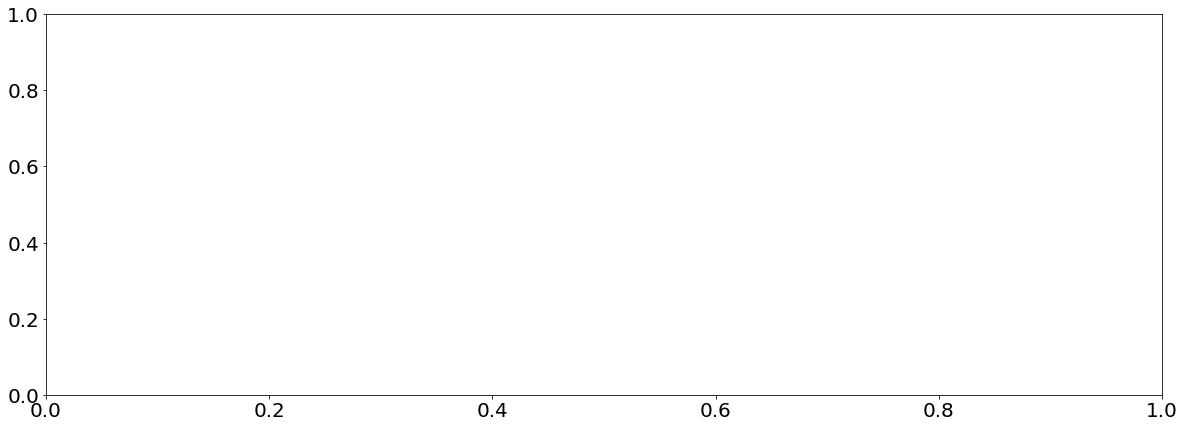

In [4]:
mpl.rcParams['font.size'] = 20.0
fig, ax = plt.subplots(1,1, figsize=(20,7), sharex=True)
plots.generic_plot_dist_distribution(
    ax, 
    [
        dms['groundtruth_sum'],
        dms['baseline_sum'],
        dms['model_sum'],
    ], ["Source", "Baseline", "Model"], ticks=[10, 20, 50, 100, 338], scaley='linear')

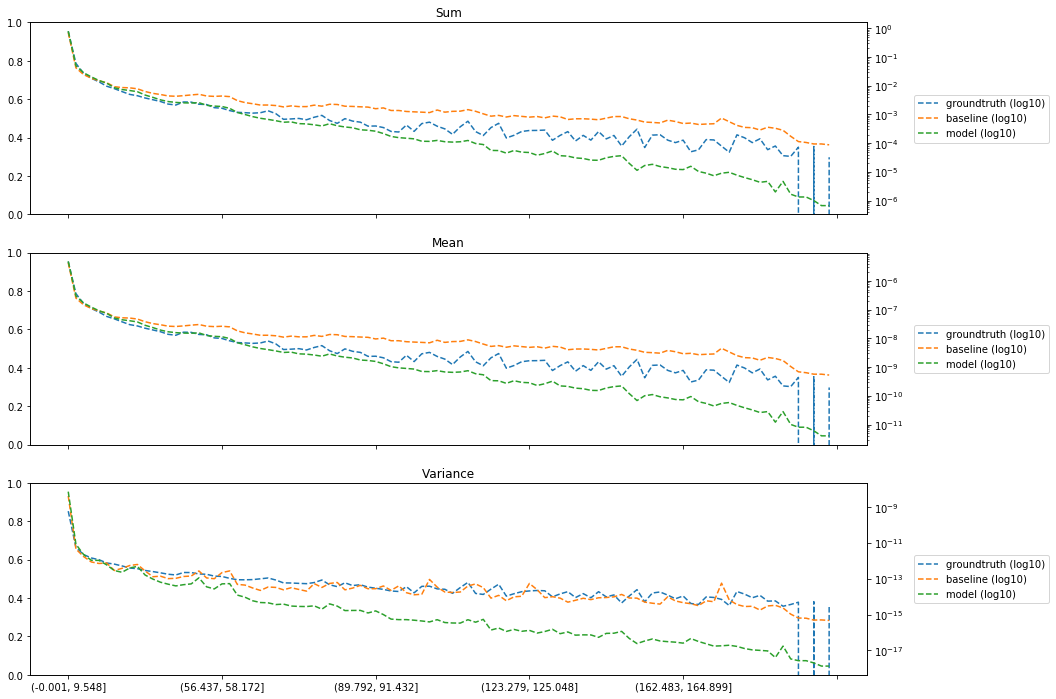

In [125]:
_ = plots.plot_distance_metrics(dms, ['groundtruth', 'baseline', 'model'], show_norm=False)

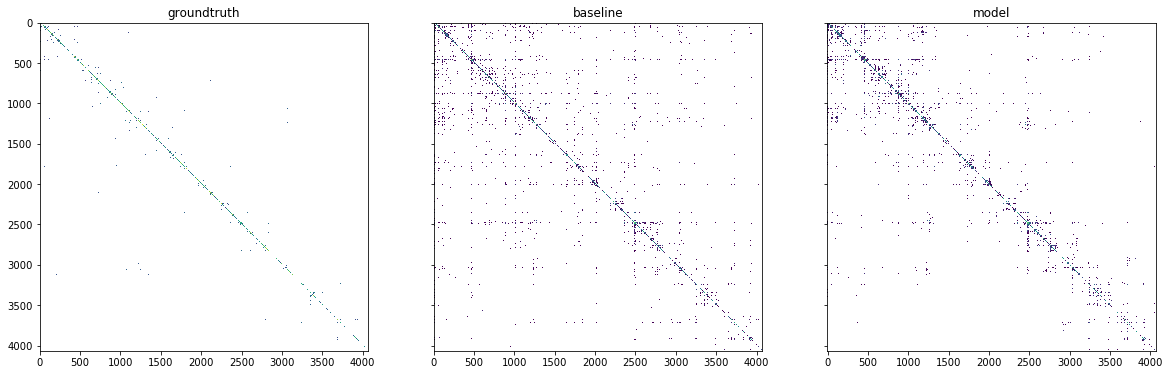

In [99]:
_ = plots.plot_odms([odm, baseline_odm, model_odm], ['groundtruth', 'baseline', 'model'])

In [1]:
model_se = np.square(np.subtract(dms['groundtruth_sum'], dms['model_sum']))
baseline_se = np.square(np.subtract(dms['groundtruth_sum'], dms['baseline_sum']))
print("Model MSE: {:.5e}".format(model_se.mean()))
print("Baseline MSE: {:.5e}".format(baseline_se.mean()))

NameError: name 'np' is not defined

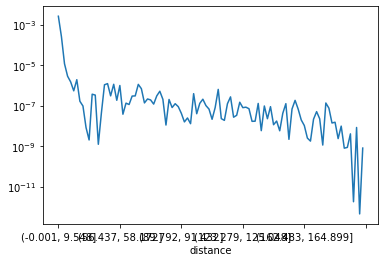

In [37]:
model_se.plot(logy=True)

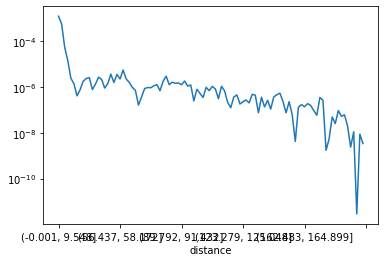

In [38]:
baseline_se.plot(logy=True)

In [152]:
zones.crs

<Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Netherlands - onshore
- bounds: (3.2, 50.75, 7.22, 53.7)
Coordinate Operation:
- name: RD New
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

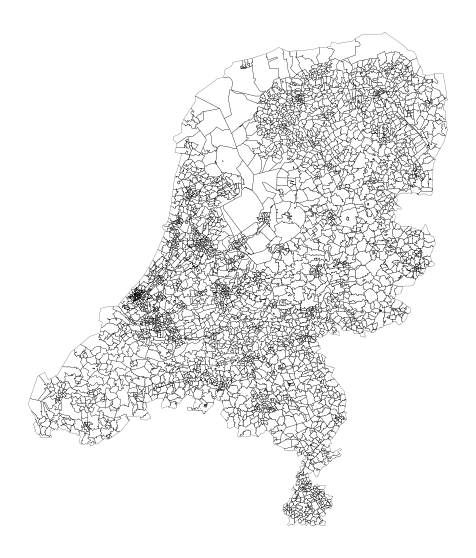

In [162]:
fig, ax = plt.subplots(1,1, figsize=(10, 10))
zones.plot(ax = ax, edgecolor='black', facecolor='none', linewidth=0.2)
ax.set_axis_off()